In [79]:
!pip install xgboost
!pip install optuna


In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:

#THU THẬP VÀ TIỀN XỬ LÝ
df=pd.read_csv(r"E:\CHROME\DA\E-COMMERCE\Fraudulent_E-Commerce_Transaction_Data_Full.csv")
#Hiển thị 10 dòng đầu
df.head()


,Unnamed: 0.1,Unnamed: 0,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,0,0.0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,1,1.0,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,2,2.0,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,3,3.0,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,4,4.0,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [82]:
df_cleaned=df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
df_cleaned.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [83]:
#đếm số lượng các giá trị thiếu trong cột
print(df_cleaned.isnull().sum())

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [84]:
# Xóa tất cả dòng trùng lặp
df_cleaned = df.drop_duplicates()

# Kiểm tra lại số dòng sau khi xóa
print("Số dòng ban đầu:", len(df))
print("Số dòng sau khi xóa trùng:", len(df_cleaned))

Số dòng ban đầu: 1520220
Số dòng sau khi xóa trùng: 1520220


In [85]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,1520220.0,760109.500000,438849.857452,0.0,380054.75,760109.50,1140164.25,1520219.00
Unnamed: 0,1496586.0,748292.500000,432027.309321,0.0,374146.25,748292.50,1122438.75,1496585.00
Transaction Amount,1520220.0,226.849113,270.765115,10.0,68.63,151.76,296.05,12701.75
Quantity,1520220.0,3.000240,1.414889,1.0,2.00,3.00,4.00,5.00
Customer Age,1520220.0,34.513578,10.003328,-16.0,28.00,35.00,41.00,86.00
Is Fraudulent,1520220.0,0.050178,0.218313,0.0,0.00,0.00,0.00,1.00
Account Age Days,1520220.0,179.615744,106.880635,1.0,86.00,179.00,272.00,365.00
Transaction Hour,1520220.0,11.286313,6.976137,0.0,5.00,11.00,17.00,23.00


In [86]:
df_cleaned.describe(include="O")

,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Customer Location,Device Used,IP Address,Shipping Address,Billing Address
count,1520220,1520220,1520220,1520220,1520220,1520220,1520220,1520220,1520220,1520220
unique,1496586,1496586,1366540,4,5,99412,3,1496278,1496582,1496583
top,23e3c107-f2fc-48c2-abbc-7b809bf6f102,d8d7a64e-8419-4421-910a-a7cf709a900b,2024-01-27 04:00:16,credit card,electronics,New Michael,mobile,206.86.236.36,"289 Adams Wells\nWest Joeltown, LA 69190","289 Adams Wells\nWest Joeltown, LA 69190"
freq,2,2,6,380275,304790,1294,507505,3,2,2


In [87]:
"""
count	Số lượng giá trị khác NaN trong cột
unique	Số lượng giá trị duy nhất
top	Giá trị xuất hiện nhiều nhất
freq	Tần suất xuất hiện của giá trị phổ biến nhất (top)
"""

'\ncount\tSố lượng giá trị khác NaN trong cột\nunique\tSố lượng giá trị duy nhất\ntop\tGiá trị xuất hiện nhiều nhất\nfreq\tTần suất xuất hiện của giá trị phổ biến nhất (top)\n'

In [88]:
#Hàm tiền xử lý dữ ->chuẩn bị cho mô hinhg học máy
def clean_data(df) -> pd.DataFrame:

    #chuyển đổi cột ngày tháng, tù string sang date time 
    df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
    
    #tạo ra 3 cột thời gian mới 
    df['Transaction Day'] = df["Transaction Date"].dt.day
    df["Transaction DOW"] = df["Transaction Date"].dt.day_of_week
    df["Transaction Month"] = df["Transaction Date"].dt.month
    
    
    #Xử lý cột sai giá 
    ''' 
    nếu tuổi <-9 thì lấy giá trị tuyệt đối, còn -9 đến 8 thay bằng tuổi trung bình
    '''
    mean_value = np.round(df['Customer Age'].mean(),0) 
    df['Customer Age'] = np.where(df['Customer Age'] <= -9, 
                                    np.abs(df['Customer Age']), 
                                    df['Customer Age'])
    
    df['Customer Age'] = np.where(df['Customer Age'] < 9, 
                                    mean_value, 
                                    df['Customer Age'])
    
    
    #Thêm cột, kiểm tra xem có trùng địa chỉ không, nếu có là 1, không là00
    df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)
    

    #Loại bỏ các cột không cần 
    df.drop(columns=["Transaction ID", "Customer ID", "Customer Location",
                     "IP Address", "Transaction Date","Shipping Address","Billing Address"], inplace=True)
    
    
    int_col = df.select_dtypes(include="int").columns
    float_col = df.select_dtypes(include="float").columns
    
    df[int_col] = df[int_col].apply(pd.to_numeric, downcast='integer')
    df[float_col] = df[float_col].apply(pd.to_numeric, downcast='float')
    
    return df

In [89]:
#Kết quả
cleaned_df = clean_data(df)


In [90]:
cleaned_df.head(10)

,Unnamed: 0.1,Unnamed: 0,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction DOW,Transaction Month,Is Address Match
0,0,0.0,58.090000,bank transfer,electronics,1,17.0,tablet,0,30,5,20,1,2,1
1,1,1.0,389.959991,debit card,electronics,2,40.0,desktop,0,72,8,25,6,2,1
2,2,2.0,134.190002,PayPal,home & garden,2,22.0,tablet,0,63,3,18,0,3,1
3,3,3.0,226.169998,bank transfer,clothing,5,31.0,desktop,0,124,20,16,5,3,1
4,4,4.0,121.529999,bank transfer,clothing,2,51.0,tablet,0,158,5,15,0,1,1
5,5,5.0,166.410004,bank transfer,toys & games,2,34.0,tablet,0,38,10,30,1,1,0
6,6,6.0,92.879997,PayPal,toys & games,2,14.0,tablet,0,119,19,4,6,2,1
7,7,7.0,318.140015,credit card,health & beauty,4,42.0,desktop,0,251,13,20,1,2,1
8,8,8.0,47.919998,bank transfer,home & garden,4,38.0,desktop,0,190,19,3,6,3,1
9,9,9.0,121.779999,bank transfer,health & beauty,4,39.0,mobile,0,343,21,16,1,1,1


In [91]:
cleaned_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
cleaned_df.head(10)


,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction DOW,Transaction Month,Is Address Match
0,58.090000,bank transfer,electronics,1,17.0,tablet,0,30,5,20,1,2,1
1,389.959991,debit card,electronics,2,40.0,desktop,0,72,8,25,6,2,1
2,134.190002,PayPal,home & garden,2,22.0,tablet,0,63,3,18,0,3,1
3,226.169998,bank transfer,clothing,5,31.0,desktop,0,124,20,16,5,3,1
4,121.529999,bank transfer,clothing,2,51.0,tablet,0,158,5,15,0,1,1
5,166.410004,bank transfer,toys & games,2,34.0,tablet,0,38,10,30,1,1,0
6,92.879997,PayPal,toys & games,2,14.0,tablet,0,119,19,4,6,2,1
7,318.140015,credit card,health & beauty,4,42.0,desktop,0,251,13,20,1,2,1
8,47.919998,bank transfer,home & garden,4,38.0,desktop,0,190,19,3,6,3,1
9,121.779999,bank transfer,health & beauty,4,39.0,mobile,0,343,21,16,1,1,1


<Axes: xlabel='Transaction Amount', ylabel='Count'>

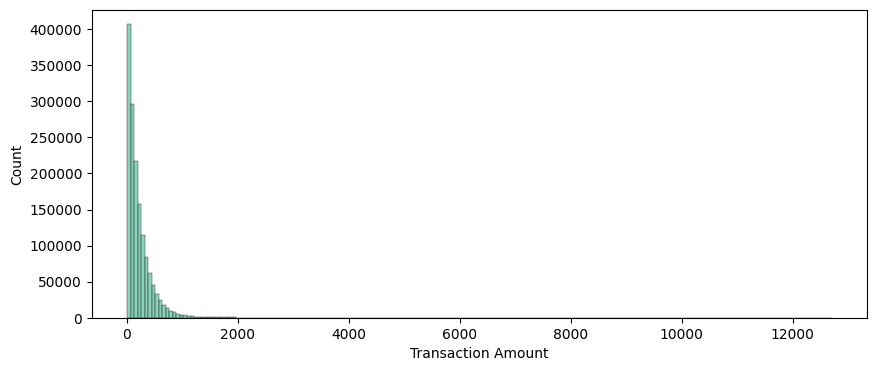

In [92]:
plt.figure(figsize=(10,4))
sns.histplot(cleaned_df["Transaction Amount"],bins=200)

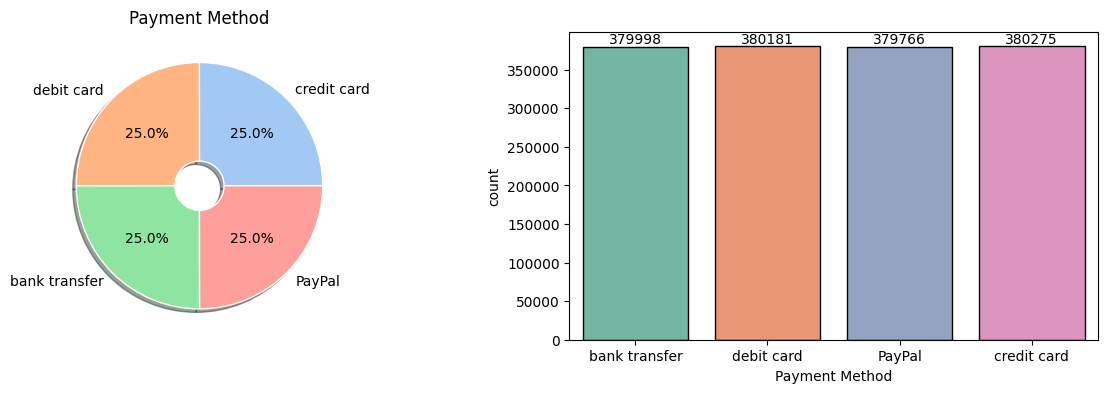

In [93]:
payment_count =cleaned_df["Payment Method"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(payment_count,labels = payment_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Payment Method")

plt.subplot(1,2,2)

ax = sns.countplot(data=cleaned_df,x="Payment Method",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)


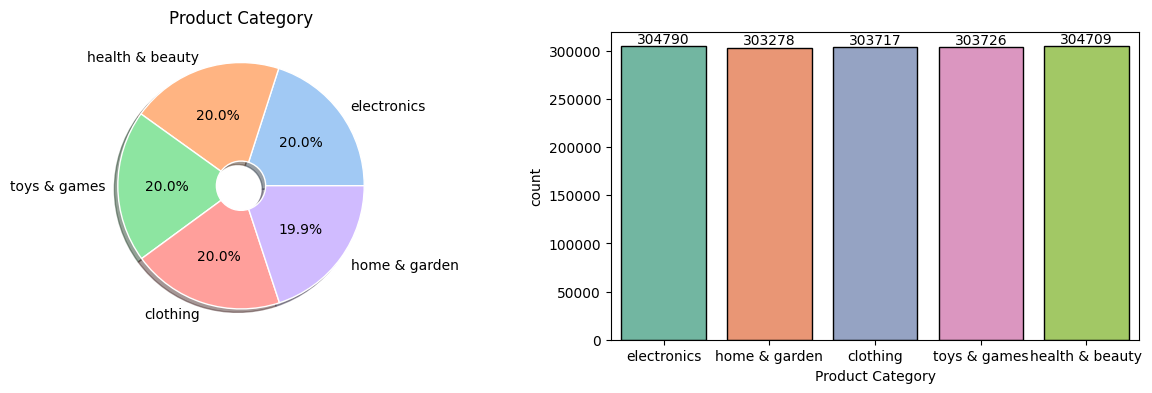

In [94]:
category_count = cleaned_df["Product Category"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(category_count,labels = category_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Product Category")

plt.subplot(1,2,2)

ax = sns.countplot(data=cleaned_df,x="Product Category",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

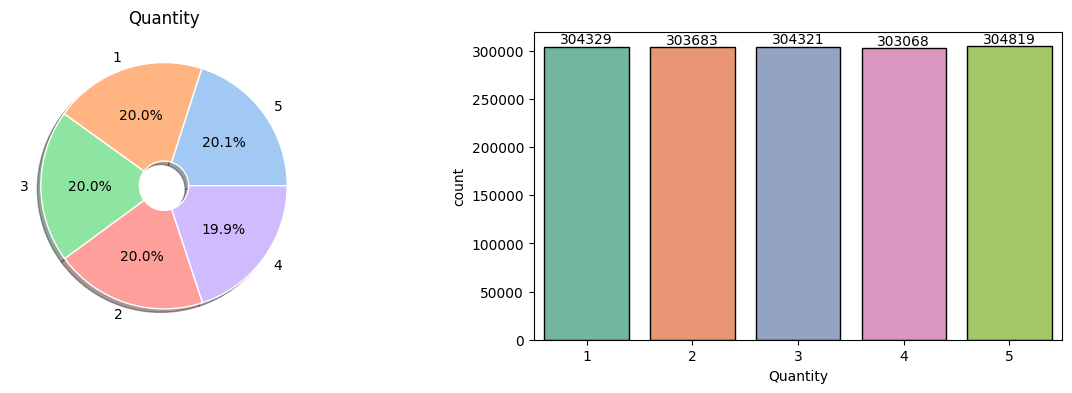

In [95]:
quantity_count =cleaned_df["Quantity"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(quantity_count,labels = quantity_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Quantity")

plt.subplot(1,2,2)

ax = sns.countplot(data=cleaned_df,x="Quantity",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

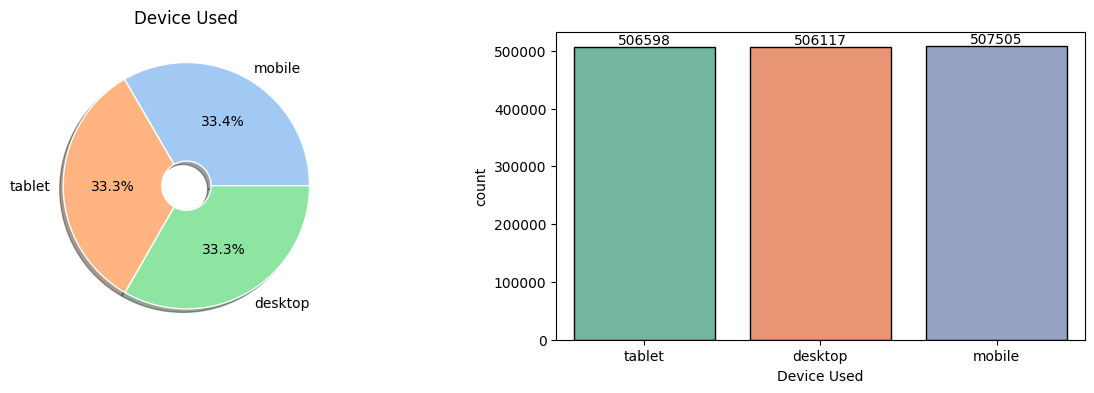

In [96]:
device_count = cleaned_df["Device Used"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(device_count,labels = device_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Device Used")

plt.subplot(1,2,2)

ax = sns.countplot(data=cleaned_df,x="Device Used",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='Account Age Days', ylabel='Count'>

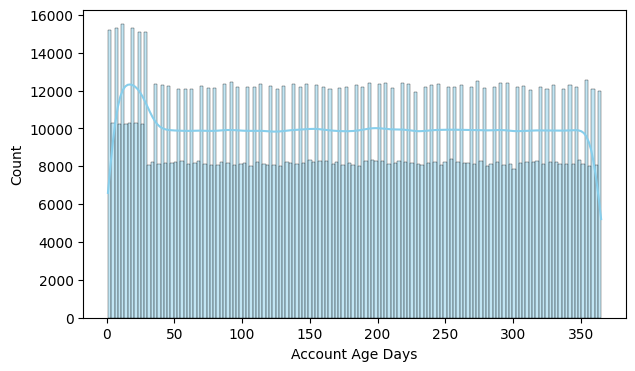

In [97]:
plt.figure(figsize=(7,4))
sns.histplot(data=cleaned_df, x="Account Age Days",bins=150,kde=True,color='skyblue')

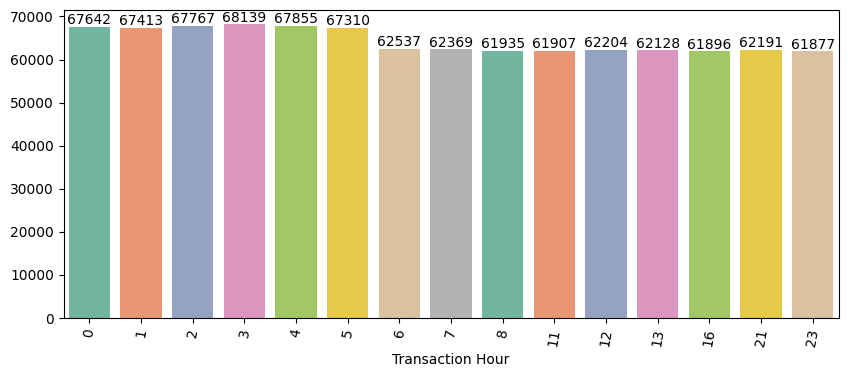

In [98]:
hour_count =cleaned_df["Transaction Hour"].value_counts().head(15)

plt.figure(figsize=(10,4))
sns.set_palette('Set2')
colors = sns.color_palette()
ax=sns.barplot(x=hour_count.index, y=hour_count.values,palette=colors)
plt.xticks(rotation=80)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

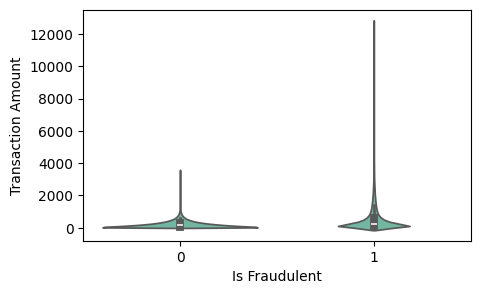

In [99]:
plt.figure(figsize=(5,3))
sns.violinplot(data=cleaned_df, x='Is Fraudulent', y='Transaction Amount')
plt.show()


In [100]:
column = ['Payment Method', 'Product Category', 
       'Quantity', 'Device Used','Transaction DOW', 
       'Transaction Month','Is Address Match']

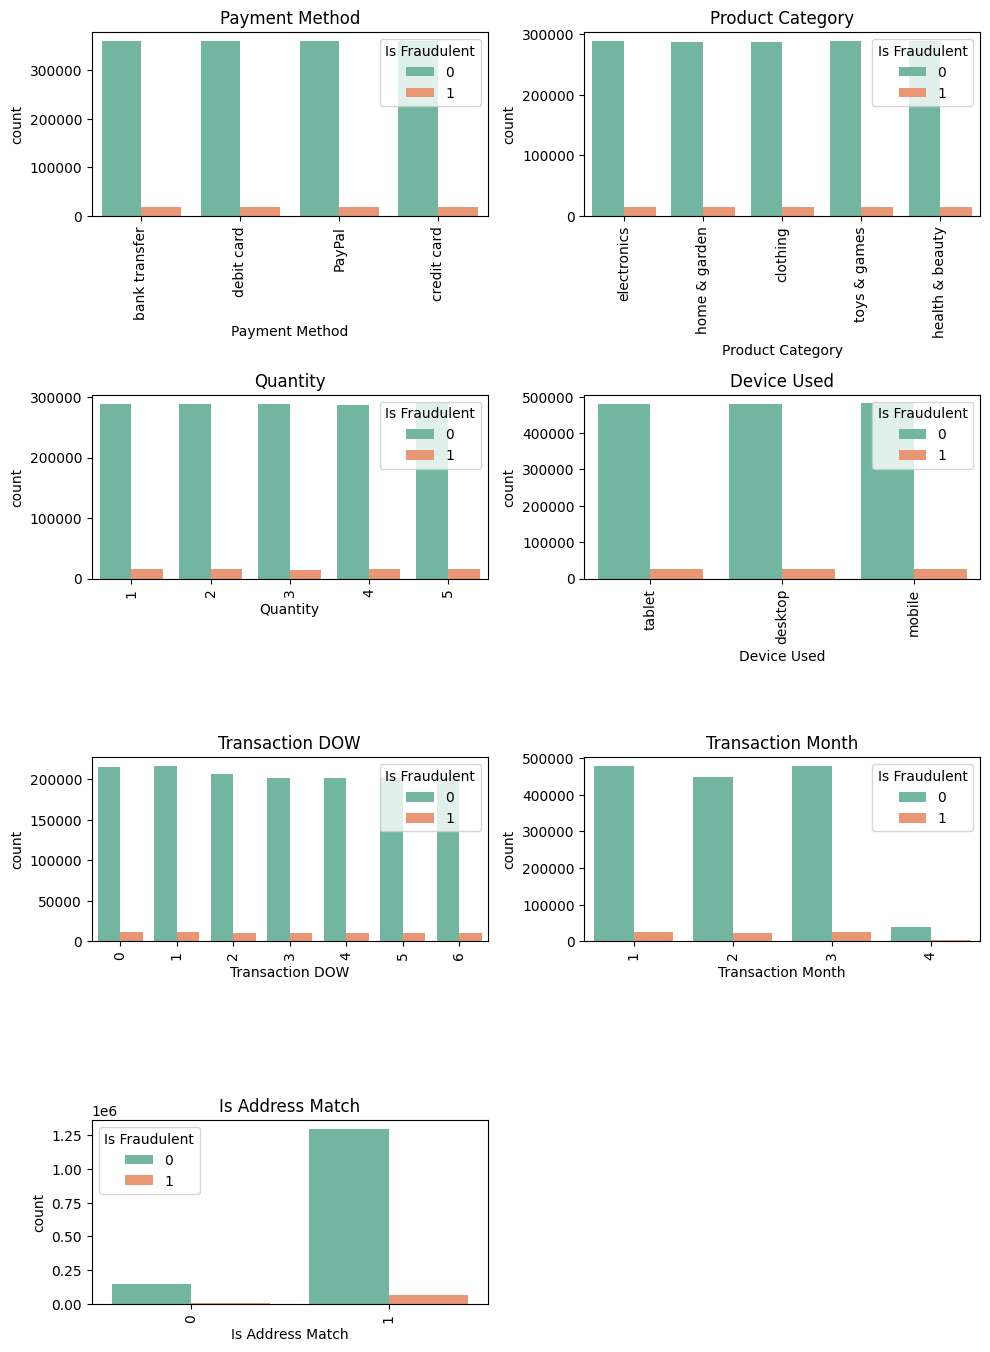

In [101]:

plt.figure(figsize=(10,35))
plot_num = 1
for col in column:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=cleaned_df, x=col, hue="Is Fraudulent")
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
    plot_num += 1


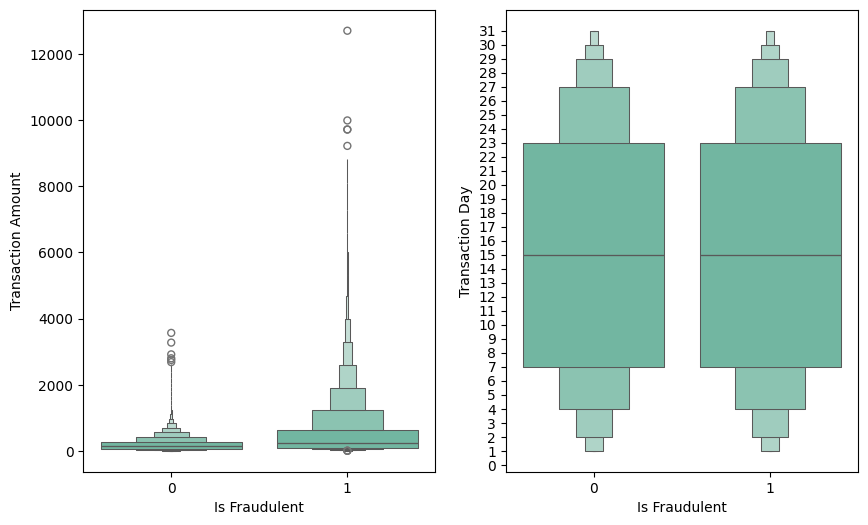

In [102]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxenplot(x='Is Fraudulent', y='Transaction Amount', data=cleaned_df)
plt.subplot(1,2,2)
sns.boxenplot(x='Is Fraudulent', y='Transaction Day', data=cleaned_df)
plt.yticks(np.arange(0,32))
plt.show()

In [103]:
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
scaler = StandardScaler()
cleaned_df[numeric_features] = scaler.fit_transform(cleaned_df[numeric_features])
cleaned_df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction DOW,Transaction Month,Is Address Match
0,-0.623268,bank transfer,electronics,-1.413709,-1.801229,tablet,0,-1.399840,-0.901117,20,1,2,1
1,0.602408,debit card,electronics,-0.706939,0.545718,desktop,0,-1.006878,-0.471079,25,6,2,1
2,-0.342212,PayPal,home & garden,-0.706939,-1.291023,tablet,0,-1.091084,-1.187809,18,0,3,1
3,-0.002508,bank transfer,clothing,1.413369,-0.372653,desktop,0,-0.520354,1.249071,16,5,3,1
4,-0.388969,bank transfer,clothing,-0.706939,1.668171,tablet,0,-0.202242,-0.901117,15,0,1,1


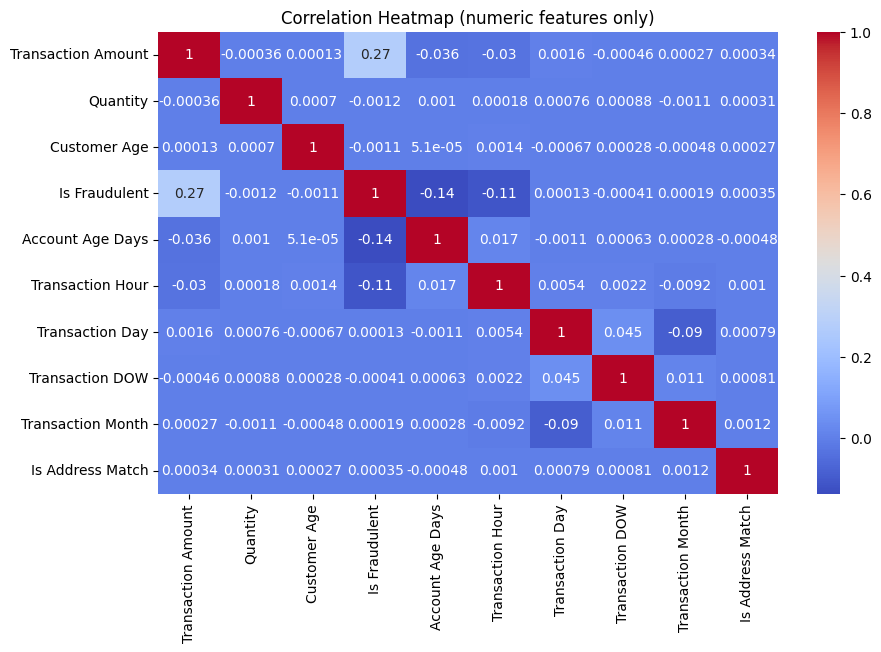

In [104]:
"""phương pháp tên là chuẩn hóadl chuẩn standardscaler, vs thư v iện sklearn.preprocessing
→ Nó biến đổi dữ liệu sao cho:
s(scaled)=(x-mean(x))/std(x)

Tức là:

Trung bình (mean) = 0

Độ lệch chuẩn (standard deviation) = 1
Giá trị	Ý nghĩa
0	= bằng trung bình (mean của cột)
Số dương (vd 1.2)	= lớn hơn trung bình
Số âm (vd -0.9)	= nhỏ hơn trung bình
Khoảng cách với 0	= độ lệch so với trung bình (tính bằng số lần độ lệch chuẩn)
"""
plt.figure(figsize=(10,6))
sns.heatmap(cleaned_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features only)")
plt.show()


In [105]:
#Dữ liệu kiểm tra gian lận

test_df=pd.read_csv(r"E:\CHROME\fraud_test_data.csv")
test_df.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,TX100000,CUST4259,752.21,2025-01-08 15:21:40,Bank Transfer,Clothing,7,28,Port Robin,Tablet,160.237.50.115,"3850 Poole Ville, New Nathanmouth, MN 89266","29573 Hamilton Mill Suite 871, New Debra, HI 2...",0,738,19
1,TX100001,CUST4811,1901.68,2025-01-13 01:34:45,PayPal,Home,3,48,North Mandyfort,Desktop,148.1.124.117,"00848 Lopez Views Suite 987, Lake Travisbury, ...","Unit 4099 Box 2030, DPO AP 71904",0,1589,3
2,TX100002,CUST4363,1465.33,2025-03-29 07:21:36,Crypto,Sports,3,60,East Donnaland,Desktop,148.243.52.39,"381 Allen Forest Apt. 244, Johnsonhaven, CO 76219","215 Teresa Crossing, North David, AL 55614",0,1935,9
3,TX100003,CUST3107,1199.32,2025-07-07 13:34:35,Credit Card,Electronics,2,49,Lake Robert,Desktop,204.181.111.41,"6535 Harris Mews, Mallorymouth, TN 48916","702 Jackson Squares Apt. 889, New Rickyport, G...",0,224,9
4,TX100004,CUST3763,316.26,2025-09-28 05:13:03,Crypto,Electronics,3,44,Greenburgh,Desktop,50.194.170.244,"854 Ellis Oval, Anitatown, DC 68406","Unit 5923 Box 6523, DPO AP 14671",0,154,23


In [106]:
#HUẤN LUYỆN MÔ HÌNH 

X = df.drop(columns=["Is Fraudulent"])
y = df["Is Fraudulent"]

# 70% train, 30% còn lại tách thành val + test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Chia tiếp 30% còn lại thành 15% val + 15% test (tức 50/50 của X_temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")



Train: 1064154, Validation: 228033, Test: 228033


In [107]:
#Phân loại cột dữ liệu (feature classification) để chuẩn bị cho quá trình tiền xử lý (preprocessing) trước khi đưa vào mô hình học máy.
cat_col = X_train.select_dtypes(include="O").columns  #Chọn lọc tất cả các cột dữ liệu "object", cat_col sẽ chứa danh sách các cột phân loại(categorical features)

num_col = [] #Bắt đầu với hàm rỗng
for col in X_train.columns:
    if col not in cat_col  and col != 'Is Address Match':
        num_col.append(col)
#Duyệt qua toàn bộ cột của train_data, nếu ko chứa cột is address match thì thêm cột vào danh sách num_col
#Mục tiêu: tách dữ liệu thành hai nhóm:
#cat_col->danh sách cootj phan loại(kiểu object/string)
#num_col->danh sách cột (kiểu int/float) loại cột is address match

#Áp dụng các bước tiền xử lý phù hợp
transformer = ColumnTransformer(transformers=[
    ('encoding',OneHotEncoder(),cat_col), #Mã hóa cột phân loại
    ('scaling',StandardScaler(),num_col)  #Chuẩn đoán các cột số
],remainder='passthrough')
#Kết quả: Mỗi loại dl được xử lý đúng cách trước khi huấn luyện mô hình

In [108]:
#Tạo ra một biến chứa các mô hình học máy khác nhau muốn kiểm thử
classifiers = {
    "Logistic Regression" : LogisticRegression(),
    "Bernoulli NB" : BernoulliNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "XGB": XGBClassifier()
}
#Lợi ích:Giúp tự động hóa quy trình huấn luyện và xử lý mô hình
#Dễ dàng huấn luyện và ss nhiều mô hình một cacách tự động
#Dùng được với pipeline tiền xử lý (ColumnTransformer) đã tạo trước đó.

In [109]:
"""
HUẤN LUYỆN VÀ ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH
Nó là phần “chạy mô hình thực tế” sau khi bạn đã chuẩn bị xong dữ liệu (train_data, test_data) và pipeline (transformer).

Mục đích: Huấn luyện và kiểm thử các mô hình: Linear Regression, Random Forest, XGB...

Đo thời gian train, in ra độ chính xác (accuracy), ma trận nhầm lẫn (confusion matrix), và báo cáo chi tiết (classification report).
Lưu kết quả accuracy để so sánh sau.

"""




'\nHUẤN LUYỆN VÀ ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH\nNó là phần “chạy mô hình thực tế” sau khi bạn đã chuẩn bị xong dữ liệu (train_data, test_data) và pipeline (transformer).\n\nMục đích: Huấn luyện và kiểm thử các mô hình: Linear Regression, Random Forest, XGB...\n\nĐo thời gian train, in ra độ chính xác (accuracy), ma trận nhầm lẫn (confusion matrix), và báo cáo chi tiết (classification report).\nLưu kết quả accuracy để so sánh sau.\n\n'

Classifier: Logistic Regression
Validation Accuracy: 0.9549
Training time: 1.74s
Classifier name : Logistic Regression
Validation Accuracy : 0.9549
Confusion matrix :
[[216418    172]
 [ 10112   1331]]
Classification report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    216590
           1       0.89      0.12      0.21     11443

    accuracy                           0.95    228033
   macro avg       0.92      0.56      0.59    228033
weighted avg       0.95      0.95      0.94    228033

Logistic Regression Training time: 1.74 seconds
Classifier: Bernoulli NB
Validation Accuracy: 0.9498
Training time: 1.57s
Classifier name : Bernoulli NB
Validation Accuracy : 0.9498
Confusion matrix :
[[216590      0]
 [ 11443      0]]
Classification report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    216590
           1       0.00      0.00      0.00     11443

    accuracy           

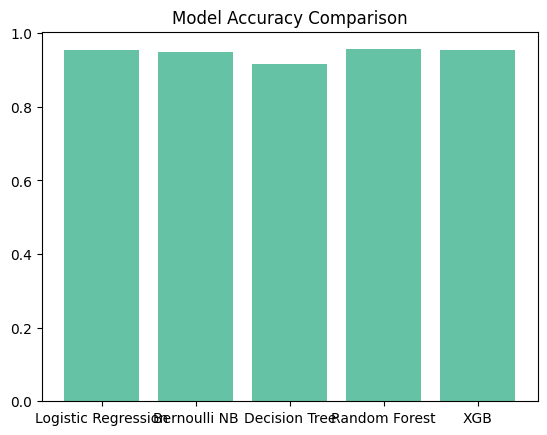

CPU times: total: 5min 23s
Wall time: 5min 7s


In [110]:
%%time

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('encoding', OneHotEncoder(handle_unknown='ignore'), cat_col),
    ('scaling', StandardScaler(), num_col)
], remainder='passthrough')
#bỏ qua các giá trị ngoại lai tỏng tập test, giá trị ko xuat shienej trong ập train
#TạTạo dânh sách để lưu kết quả ->Dùng để lưu lại tên mô hình và điểm accuracy tương ứng — sau này có thể vẽ biểu đồ so sánh.
classifier_name = []
accuracy = []
#Lặp qua từng mô hình
for name, classifier in classifiers.items():
    #Tạo pipeline xử lý dl + mô hình
    model = Pipeline(steps=[
        ('transformer',transformer),
        ('classifier',classifier)
    ])
    #Pipeline gồm 2 bước: chuẩn hóa dl(One+StandarScaler)
    #Classifier: mô hình thự tế(hooif quy, rừng....)
    #lợi ích:Nhờ pipeline này,không cần xử lý thủ công dữ liệu trước mỗi mô hình.
    #HUẤN LUYỆN MÔ HÌNH VÀ ĐO THỜI GIAN
    start_time = time.time()
    
    model.fit(X_train,y_train) #fit lalà bước huấn luyện
    
    training_time = time.time() - start_time
      # Đánh giá trên Validation trước
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    print(f"Classifier: {name}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Training time: {training_time:.2f}s")
    print("="*50)
    
    classifier_name.append(name)
    accuracy.append(val_acc)

    
    #chọn model tốt nhất 
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)#Tỷ lệ dự đoán đúng
    conf_mat = confusion_matrix(y_val, val_pred)#Cho biết mô hình nhầm lẫn bao nhiêu giữgiữa 0<->1
    class_report = classification_report(y_val, val_pred) #hiển thị precision, recall, f1_score
    print(f"Classifier name : {name}")
    print(f"Validation Accuracy : {val_acc:.4f}")
    print(f"Confusion matrix :\n{conf_mat}")
    print(f"Classification report :\n{class_report}")
    print(f"{name} Training time: {training_time:.2f} seconds")
    print("="*55)
    #LuLưu kết 
    classifier_name.append(name)
    accuracy.append(val_acc)
   
#Trực quan hóa hiệu suất momô hình 
plt.bar(classifier_name, accuracy)
plt.title("Model Accuracy Comparison")
plt.show()

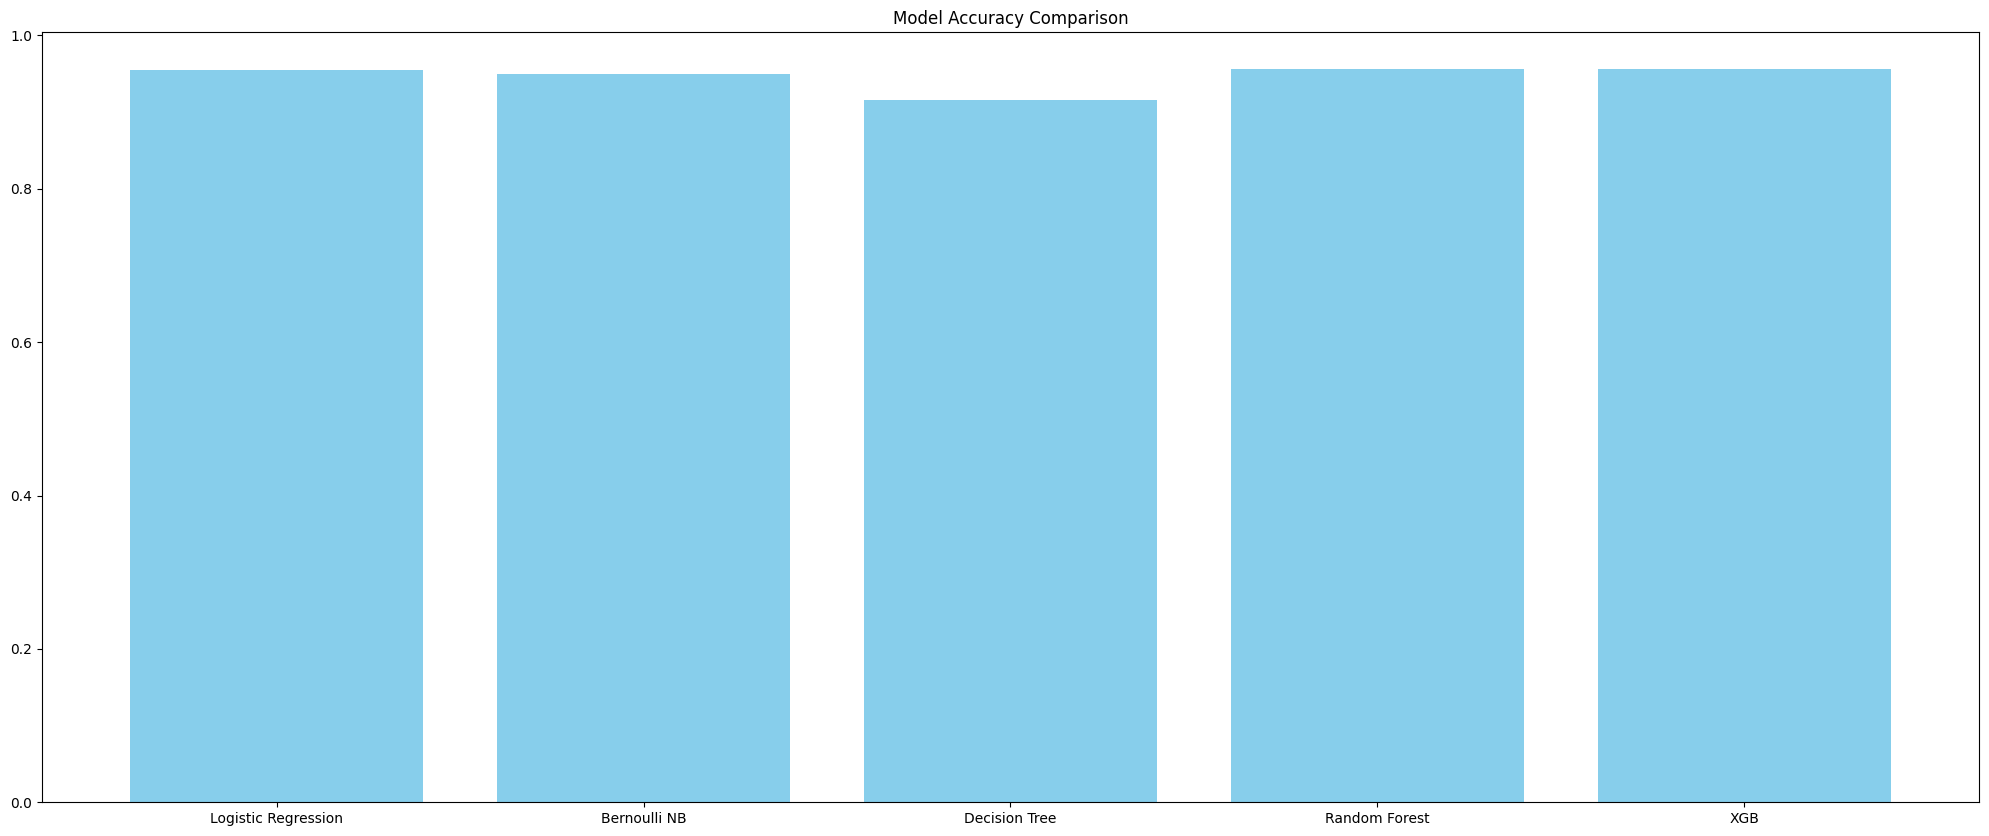

In [111]:
plt.figure(figsize=(25,10))
plt.bar(classifier_name, accuracy,color="skyblue")
plt.title("Model Accuracy Comparison")
plt.show()

In [112]:
# Hàm tối ưu Optuna
def objective(trial):
    params = {
        "tree_method": "hist",
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 3.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 700),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 1.0),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
    }

    classifier = XGBClassifier(**params)

    model = Pipeline(steps=[
        ('transformer', transformer),
        ('classifier', classifier)
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    return acc

#Tối ưu
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=70)

print("Best Hyperparameters:", study.best_params)
print("Best Validation Accuracy:", study.best_trial.value)


[I 2025-10-24 00:16:04,020] A new study created in memory with name: no-name-03a2d224-724b-4cb4-ae9d-cc9d3b038ea5
[I 2025-10-24 00:16:13,851] Trial 0 finished with value: 0.9498186665965014 and parameters: {'learning_rate': 2.596731988312598, 'n_estimators': 163, 'max_depth': 19, 'min_child_weight': 4, 'gamma': 0.8873510913072894, 'subsample': 0.5221942102909585, 'colsample_bytree': 0.35198545947295057, 'reg_alpha': 0.11085793777802844}. Best is trial 0 with value: 0.9498186665965014.
[I 2025-10-24 00:16:27,546] Trial 1 finished with value: 0.955646770423579 and parameters: {'learning_rate': 0.04377064144278007, 'n_estimators': 171, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.9831931756741091, 'subsample': 0.6492683859130957, 'colsample_bytree': 0.8147980991196345, 'reg_alpha': 0.808407217000454}. Best is trial 1 with value: 0.955646770423579.
[I 2025-10-24 00:16:53,158] Trial 2 finished with value: 0.9205202755741494 and parameters: {'learning_rate': 2.186751557800119, 'n_estima

Best Hyperparameters: {'learning_rate': 0.10269564039869888, 'n_estimators': 573, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 0.45602023105015593, 'subsample': 0.3483378681462177, 'colsample_bytree': 0.10982585640372189, 'reg_alpha': 0.6767697801026856}
Best Validation Accuracy: 0.9557739449991887


In [113]:
optuna.visualization.plot_optimization_history(study)


In [114]:
optuna.visualization.plot_parallel_coordinate(study)

In [115]:
optuna.visualization.plot_slice(study)


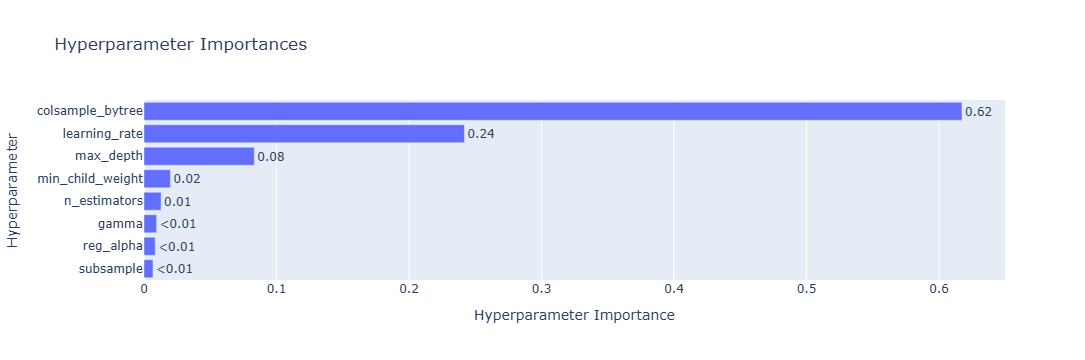

In [116]:
optuna.visualization.plot_param_importances(study)


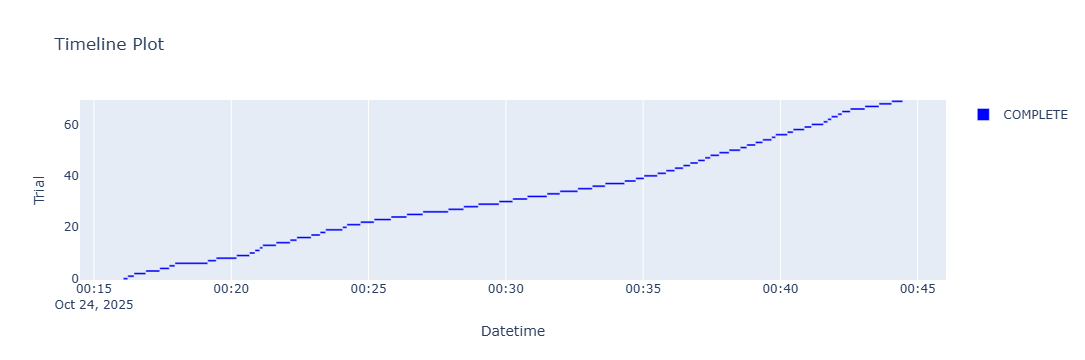

In [117]:
optuna.visualization.plot_timeline(study)


In [132]:

cleaned_df.columns



Index(['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Device Used', 'Is Fraudulent', 'Account Age Days',
       'Transaction Hour', 'Transaction Day', 'Transaction DOW',
       'Transaction Month', 'Is Address Match'],
      dtype='object')

In [4]:
import joblib

# Mở mô hình đã lưu
model = joblib.load("fraud_detection_model.pkl")

# Nếu có transformer
transformer = joblib.load("transformer.pkl")

# Kiểm tra kiểu dữ liệu
print(type(model))
print(type(transformer))


<class 'sklearn.pipeline.Pipeline'>
<class 'sklearn.compose._column_transformer.ColumnTransformer'>


In [5]:
model.named_steps


{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('encoding',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  Index(['Payment Method', 'Product Category', 'Device Used'], dtype='object')),
                                 ('scaling', StandardScaler(),
                                  ['Transaction Amount', 'Quantity',
                                   'Customer Age', 'Account Age Days',
                                   'Transaction Hour', 'Transaction Day',
                                   'Transaction DOW', 'Transaction Month'])]),
 'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_po

In [7]:
transformer.transformers_


[('encoding',
  OneHotEncoder(handle_unknown='ignore'),
  Index(['Payment Method', 'Product Category', 'Device Used'], dtype='object')),
 ('scaling',
  StandardScaler(),
  ['Transaction Amount',
   'Quantity',
   'Customer Age',
   'Account Age Days',
   'Transaction Hour',
   'Transaction Day',
   'Transaction DOW',
   'Transaction Month']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  ['Is Address Match'])]

In [8]:
#pipeline tự xử lý chữ, chuẩn hóa, số hóa rồi mới dự đoán.
import pandas as pd

# Đọc file kiểm tra
df_new = pd.read_csv(r"E:\CHROME\new_transaction_synthetic.csv")

# Dự đoán
predictions = model.predict(df_new)

# Nếu muốn xem xác suất gian lận
proba = model.predict_proba(df_new)


In [9]:
# Xem 5 dòng đầu
print(proba[:20])

[[0.98915064 0.01084934]
 [0.9920203  0.00797971]
 [0.9932662  0.0067338 ]
 [0.967171   0.03282901]
 [0.9879593  0.01204066]
 [0.990223   0.00977704]
 [0.98808986 0.01191014]
 [0.9839893  0.01601068]
 [0.9889842  0.0110158 ]
 [0.99045056 0.00954944]
 [0.9898497  0.01015034]
 [0.99069774 0.00930227]
 [0.9843059  0.01569407]
 [0.9593313  0.04066873]
 [0.9959459  0.0040541 ]
 [0.97672963 0.02327039]
 [0.9809997  0.0190003 ]
 [0.99470174 0.00529823]
 [0.995827   0.00417298]
 [0.99146163 0.00853837]]


In [11]:
df_new["Fraud_Probability"] = proba[:, 1]  # Cột xác suất gian lận
df_new["Fraud_Prediction"] = model.predict(df_new)  # 0 hoặc 1

# Xem 10 dòng đầu
df_new.head(10)


,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction DOW,Transaction Month,Is Address Match,Fraud_Probability,Fraud_Prediction
0,0.496714,debit card,beauty,0.927819,2.131984,tablet,0,1206,23,17,5,6,1,0.010849,0
1,-0.138264,e-wallet,electronics,0.001913,2.029297,mobile,0,777,15,15,6,12,1,0.007980,0
2,0.647689,credit card,sports,-0.060940,-0.094753,mobile,0,344,2,27,1,3,1,0.006734,0
3,1.523030,bank transfer,electronics,1.176638,1.146170,mobile,0,1283,12,16,4,4,1,0.032829,0
4,-0.234153,credit card,fashion,1.462530,-0.400428,tablet,0,919,12,6,2,5,1,0.012041,0
5,-0.234137,debit card,beauty,-0.239549,1.013286,desktop,0,12,19,20,2,2,1,0.009777,0
6,1.579213,e-wallet,electronics,0.799203,-0.175978,mobile,0,553,23,26,5,12,1,0.011910,0
7,0.767435,bank transfer,beauty,0.363891,-1.285440,tablet,0,428,19,2,2,10,1,0.016011,0
8,-0.469474,debit card,electronics,0.007437,-3.532818,mobile,0,1722,18,15,3,4,1,0.011016,0
9,0.542560,credit card,sports,0.204255,-0.268713,desktop,0,523,16,21,3,7,1,0.009549,0


In [ ]:


# Lọc top 10 giao dịch nghi gian lận nhất
top_10_fraud = df_new.sort_values(by="Fraud_Probability", ascending=False).head(10)

print(" Top 10 giao dịch nghi ngờ gian lận nhất:")
top_10_fraud[[
    "Transaction Amount",
    "Payment Method",
    "Product Category",
    "Customer Age",
    "Device Used",
    "Fraud_Probability"
]]


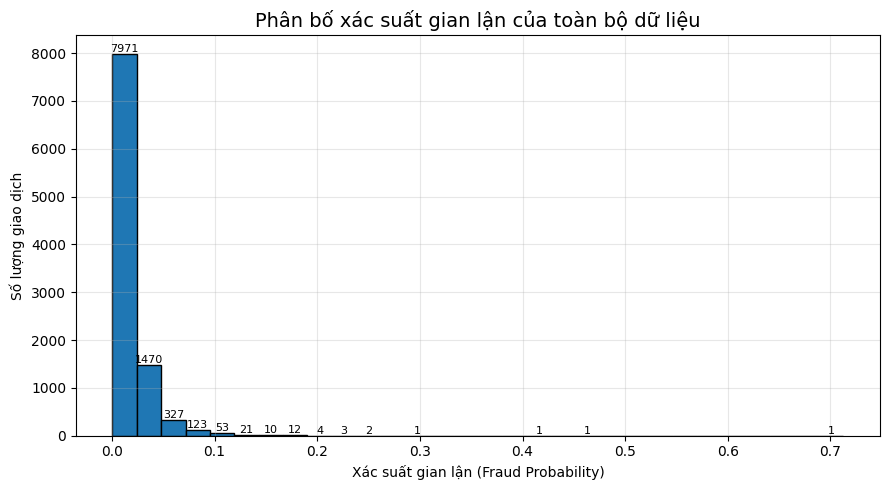

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,5))

# Vẽ histogram và lấy thông tin số lượng + vị trí cột
counts, bins, patches = plt.hist(df_new["Fraud_Probability"], bins=30, edgecolor='black')

# Hiển thị số lượng trên từng cột
for count, x in zip(counts, bins):
    if count > 0:  # chỉ hiện nếu có dữ liệu
        plt.text(x + (bins[1]-bins[0])/2, count, int(count),
                 ha='center', va='bottom', fontsize=8, rotation=0)

# Trang trí biểu đồ
plt.title("Phân bố xác suất gian lận của toàn bộ dữ liệu", fontsize=14)
plt.xlabel("Xác suất gian lận (Fraud Probability)")
plt.ylabel("Số lượng giao dịch")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
df_new1 = pd.read_csv(r"E:\CHROME\new_transaction_synthetic.csv")
new_X = transformer.transform(df_new1)


In [20]:
print(model)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Payment Method', 'Product Category', 'Device Used'], dtype='object')),
                                                 ('scaling', StandardScaler(),
                                                  ['Transaction Amount',
                                                   'Quantity', 'Customer Age',
                                                   'Account Age Days',
                                                   'Transaction Hour',
                                                   'Transaction Day',
                                                   'Transaction DO...
                               feature_types=None, feature_weights=None,
                               gamma=None

In [21]:
#Thống kê giao dịch gian lận cần phát hiện
fraud_count = predictions.sum()
fraud_rate = fraud_count / len(predictions)
print(f"Fraud cases detected: {fraud_count}")
print(f"Fraud rate: {fraud_rate:.2%}")


Fraud cases detected: 1
Fraud rate: 0.01%


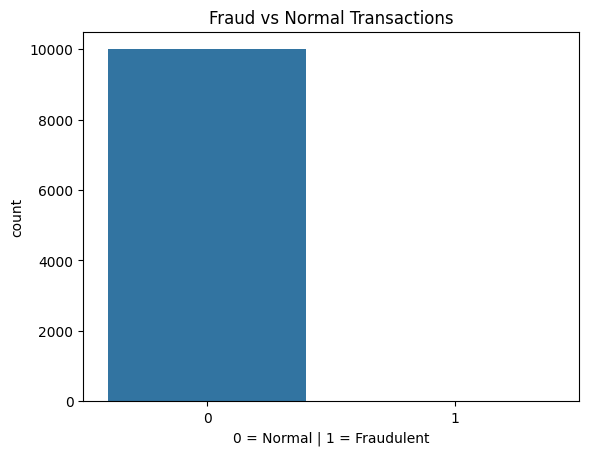

In [22]:
#vẽ biểu đồ
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=predictions)
plt.title("Fraud vs Normal Transactions")
plt.xlabel("0 = Normal | 1 = Fraudulent")
plt.show()


In [23]:
df_train=pd.read_csv(r"E:\CHROME\new_transactions.csv")
dow_map = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}

df_train["Transaction DOW"] = df_train["Transaction DOW"].map(dow_map)


In [26]:
predictions = model.predict(df_new)
#Xem 10 hàng kết quả đđầu tiên 
df_new[["Transaction Amount", "Payment Method", "Product Category",
              "Device Used", "Fraud_Prediction"]].head(10)


,Transaction Amount,Payment Method,Product Category,Device Used,Fraud_Prediction
0,0.496714,debit card,beauty,tablet,0
1,-0.138264,e-wallet,electronics,mobile,0
2,0.647689,credit card,sports,mobile,0
3,1.523030,bank transfer,electronics,mobile,0
4,-0.234153,credit card,fashion,tablet,0
5,-0.234137,debit card,beauty,desktop,0
6,1.579213,e-wallet,electronics,mobile,0
7,0.767435,bank transfer,beauty,tablet,0
8,-0.469474,debit card,electronics,mobile,0
9,0.542560,credit card,sports,desktop,0


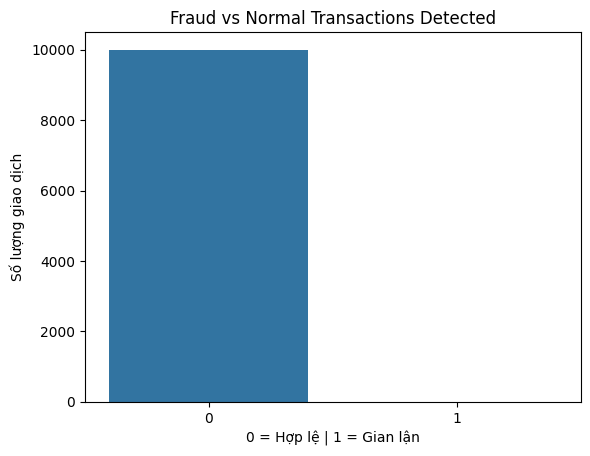

In [27]:
#Vẽ biểu đồ xem phân bố gian lận 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_new, x="Fraud_Prediction")
plt.title("Fraud vs Normal Transactions Detected")
plt.xlabel("0 = Hợp lệ | 1 = Gian lận")
plt.ylabel("Số lượng giao dịch")
plt.show()


In [31]:
test_gianlan=pd.read_csv(r"E:\CHROME\fraud_transactions_100k_full.csv")
predictions = model.predict(test_gianlan)
#Xem 10 hàng kết quả đđầu tiên 
test_gianlan.head(10)

,Transaction ID,Customer ID,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Account Age Days,Transaction Hour,Transaction Date,Transaction Day,Transaction Month,Transaction DOW,Is Address Match,Is Fraudulent
0,1,3925,442.298229,PayPal,Food,3,26,Desktop,1879,14,2025-02-08,8,2,5,1,0
1,2,3713,4308.721144,Credit Card,Luxury,9,26,Desktop,46,12,2025-02-21,21,2,4,0,1
2,3,2480,27.859785,PayPal,Luxury,1,56,Tablet,1637,16,2025-01-29,29,1,2,1,0
3,4,4553,618.726253,PayPal,Gambling,3,62,Tablet,1133,4,2025-01-15,15,1,2,1,0
4,5,3387,281.697976,PayPal,Electronics,4,33,Desktop,246,13,2025-02-12,12,2,2,1,0
5,6,1055,513.078112,Crypto,Food,1,58,Mobile,1377,20,2025-01-08,8,1,2,1,0
6,7,3327,365.327725,PayPal,Food,4,29,Desktop,1488,0,2025-01-21,21,1,1,1,0
7,8,3093,121.204813,Crypto,Luxury,3,43,Desktop,1557,14,2025-02-08,8,2,5,1,0
8,9,1369,266.200176,PayPal,Electronics,4,60,Tablet,944,12,2025-02-27,27,2,3,1,0
9,10,4579,629.351686,Crypto,Food,3,55,Mobile,893,19,2025-01-19,19,1,6,1,0


In [32]:
test_gianlan.to_csv("ketquatestgianlan.csv", index=False)
print("Đã lưu kết quả")


Đã lưu kết quả


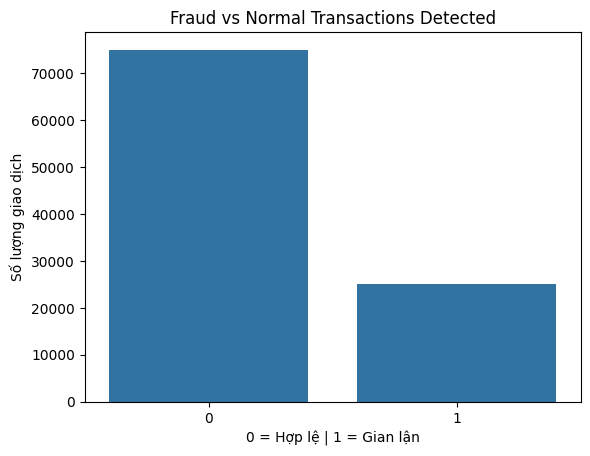

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=test_gianlan, x="Is Fraudulent")
plt.title("Fraud vs Normal Transactions Detected")
plt.xlabel("0 = Hợp lệ | 1 = Gian lận")
plt.ylabel("Số lượng giao dịch")
plt.show()

In [39]:
proba = model.predict_proba(test_gianlan)  # Lúc này sẽ ra 100.000 dong
test_gianlan["Fraud_Probability"] = proba[:, 1]
test_gianlan["Fraud_Prediction"] = model.predict(test_gianlan)


# Xem 10 dòng đầu
test_gianlan.head(10)

,Transaction ID,Customer ID,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Account Age Days,Transaction Hour,Transaction Date,Transaction Day,Transaction Month,Transaction DOW,Is Address Match,Is Fraudulent,Fraud_Probability,Fraud_Prediction
0,1,3925,442.298229,PayPal,Food,3,26,Desktop,1879,14,2025-02-08,8,2,5,1,0,0.837472,1
1,2,3713,4308.721144,Credit Card,Luxury,9,26,Desktop,46,12,2025-02-21,21,2,4,0,1,0.712245,1
2,3,2480,27.859785,PayPal,Luxury,1,56,Tablet,1637,16,2025-01-29,29,1,2,1,0,0.832873,1
3,4,4553,618.726253,PayPal,Gambling,3,62,Tablet,1133,4,2025-01-15,15,1,2,1,0,0.679225,1
4,5,3387,281.697976,PayPal,Electronics,4,33,Desktop,246,13,2025-02-12,12,2,2,1,0,0.650189,1
5,6,1055,513.078112,Crypto,Food,1,58,Mobile,1377,20,2025-01-08,8,1,2,1,0,0.455494,0
6,7,3327,365.327725,PayPal,Food,4,29,Desktop,1488,0,2025-01-21,21,1,1,1,0,0.724920,1
7,8,3093,121.204813,Crypto,Luxury,3,43,Desktop,1557,14,2025-02-08,8,2,5,1,0,0.774032,1
8,9,1369,266.200176,PayPal,Electronics,4,60,Tablet,944,12,2025-02-27,27,2,3,1,0,0.844211,1
9,10,4579,629.351686,Crypto,Food,3,55,Mobile,893,19,2025-01-19,19,1,6,1,0,0.791170,1


In [42]:
# Giả sử pipeline là mô hình đã huấn luyện xong
from joblib import load
pipeline = joblib.load("fraud_detection_model.pkl")


# Dự đoán trên dữ liệu mới
X_new = test_gianlan.drop(columns=["Is Fraudulent"])
y_new = test_gianlan["Is Fraudulent"]

y_pred_new = pipeline.predict(X_new)
y_prob_new = pipeline.predict_proba(X_new)[:, 1]

# Tính các chỉ số hiệu suất
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_new, y_pred_new))
print("AUC:", roc_auc_score(y_new, y_prob_new))


              precision    recall  f1-score   support

           0       0.83      0.09      0.16     74994
           1       0.26      0.95      0.40     25006

    accuracy                           0.30    100000
   macro avg       0.55      0.52      0.28    100000
weighted avg       0.69      0.30      0.22    100000

AUC: 0.5410566402591794


In [44]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime

# đọc dl mới
new_data = pd.read_csv(r"E:\CHROME\fraud_transactions_100k_full.csv")

# Cột nhãn thật nếu có (để đánh giá)
y_true = new_data["Is Fraudulent"]
X_new = new_data.drop(columns=["Is Fraudulent"])

# tải pipeline
pipeline = joblib.load("fraud_detection_model.pkl")

# dự đoán dl 
y_pred = pipeline.predict(X_new)

# tính hiệu suất hiện tại
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Hiệu suất mô hình hiện tại:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

#ngưỡng cảnh báo, khi hiệu xuất giảm
threshold_f1 = 0.90  # ví dụ: nếu F1 < 0.9 thì huấn luyện lại

if f1 < threshold_f1:
    print("Hiệu suất giảm - tiến hành huấn luyện lại mô hình...")

    # huấn luyện lại trên dl mới
    from sklearn.model_selection import train_test_split
    from xgboost import XGBClassifier
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline

    # Phân loại cột
    num_cols = X_new.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X_new.select_dtypes(include=["object", "category"]).columns

    # Tạo transformer
    transformer = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    # Tạo mô hình XGBoost mới
    model = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42,
        eval_metric='logloss'
    )

    # Gộp pipeline mới
    new_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Chia tập train/val để huấn luyện
    X_train, X_val, y_train, y_val = train_test_split(X_new, y_true, test_size=0.2, random_state=42, stratify=y_true)
    new_pipeline.fit(X_train, y_train)

    # Đánh giá lại mô hình mới
    y_val_pred = new_pipeline.predict(X_val)
    new_f1 = f1_score(y_val, y_val_pred)
    print(f" F1-score mô hình mới: {new_f1:.4f}")

    # lưu phiên bản mới
    version = datetime.now().strftime("%Y%m%d_%H%M")
    filename = f"fraud_detection_pipeline_v2_{version}.pkl"
    joblib.dump(new_pipeline, filename)
    print(f" Mô hình mới đã được lưu: {filename}")
else:
    print(" Hiệu suất ổn định, chưa cần huấn luyện lại.")


Hiệu suất mô hình hiện tại:
Accuracy : 0.3015
Precision: 0.2571
Recall   : 0.9487
F1-score : 0.4045
Hiệu suất giảm - tiến hành huấn luyện lại mô hình...
 F1-score mô hình mới: 0.9996
 Mô hình mới đã được lưu: fraud_detection_pipeline_v2_20251024_1701.pkl


In [64]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

#cấu hình
n_samples = 10000
np.random.seed(42)

# tạo dl giả lập
data = pd.DataFrame({
    "Transaction ID": np.arange(10001, 10001 + n_samples),
    "Customer ID": np.random.randint(100, 9999, n_samples),
    "Transaction Amount": np.round(np.random.uniform(5, 5000, n_samples), 2),
    "Payment Method": np.random.choice(["Credit Card", "Debit Card", "E-Wallet", "Bank Transfer", "Cash"], n_samples),
    "Product Category": np.random.choice(["Electronics", "Clothing", "Groceries", "Furniture", "Toys", "Beauty"], n_samples),
    "Quantity": np.random.randint(1, 5, n_samples),
    "Customer Age": np.random.randint(18, 70, n_samples),
    "Device Used": np.random.choice(["Mobile", "Desktop", "Tablet"], n_samples),
    "Account Age Days": np.random.randint(30, 2000, n_samples),
    "Transaction Hour": np.random.randint(0, 24, n_samples),
})

#tạo transaction date thực tế
start_date = datetime(2023, 1, 1)
data["Transaction Date"] = [
    (start_date + timedelta(minutes=random.randint(0, 365 * 24 * 60))).strftime("%Y-%m-%d %H:%M:%S")
    for _ in range(n_samples)
]

#tạo các đặc trưng thời gian
data["Transaction Day"] = pd.to_datetime(data["Transaction Date"]).dt.day
data["Transaction Month"] = pd.to_datetime(data["Transaction Date"]).dt.month
data["Transaction DOW"] = pd.to_datetime(data["Transaction Date"]).dt.dayofweek  # 0=Mon, 6=Sun

# các cột nhị phân và mục tiêu
data["Is Address Match"] = np.random.choice([0, 1], n_samples, p=[0.1, 0.9])
data["Is Fraud"] = np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # mục tiêu

#kiểm tra
print(data.head(10))
print(f"\nTổng số dòng: {len(data)}")

# lưu file
data.to_csv("simulated_ecommerce_10000.csv", index=False)


   Transaction ID  Customer ID  Transaction Amount Payment Method  \
0           10001         7370             2269.04     Debit Card   
1           10002          960             3423.22    Credit Card   
2           10003         5490             1802.77     Debit Card   
3           10004         5291             3340.69     Debit Card   
4           10005         5834              207.78       E-Wallet   
5           10006         6365             1956.81  Bank Transfer   
6           10007          566             3955.29       E-Wallet   
7           10008         4526             4016.02       E-Wallet   
8           10009         5678             3582.16       E-Wallet   
9           10010         8422             1025.17    Credit Card   

  Product Category  Quantity  Customer Age Device Used  Account Age Days  \
0        Groceries         1            19      Mobile              1439   
1           Beauty         3            35      Mobile               105   
2        Fur

In [61]:
X_test = data[feature_cols]

# dự đoán
y_pred = pipeline_new.predict(X_test)
y_proba = pipeline_new.predict_proba(X_test)[:, 1]

# gắn kết quả vào DataFrame
data["Predicted_Label"] = y_pred
data["Fraud_Probability"] = y_proba

# xuất kết quả
output_path = "fraud_predictions_latest.csv"
data.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f" Dự đoán hoàn tất, file lưu tại: {output_path}")
print(data.head(10))

 Dự đoán hoàn tất, file lưu tại: fraud_predictions_latest.csv
   Transaction ID  Customer ID  Transaction Amount Payment Method  \
0           10001         7370             2269.04     Debit Card   
1           10002          960             3423.22    Credit Card   
2           10003         5490             1802.77     Debit Card   
3           10004         5291             3340.69     Debit Card   
4           10005         5834              207.78       E-Wallet   
5           10006         6365             1956.81  Bank Transfer   
6           10007          566             3955.29       E-Wallet   
7           10008         4526             4016.02       E-Wallet   
8           10009         5678             3582.16       E-Wallet   
9           10010         8422             1025.17    Credit Card   

  Product Category  Quantity  Customer Age Device Used  Account Age Days  \
0        Groceries         1            19      Mobile              1439   
1           Beauty        

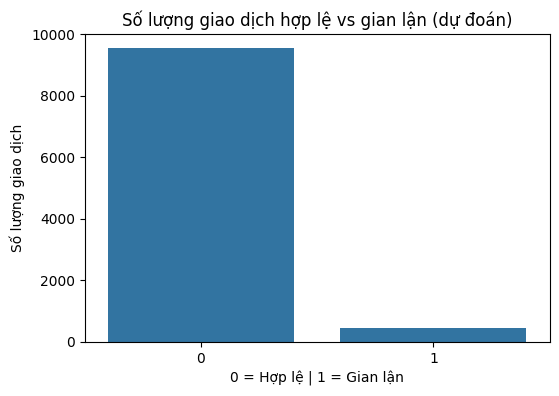

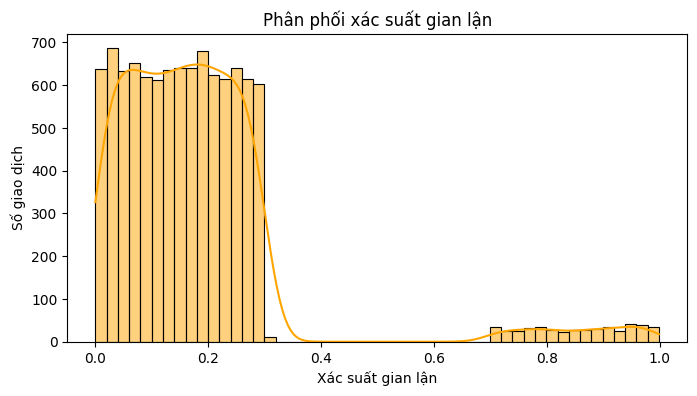

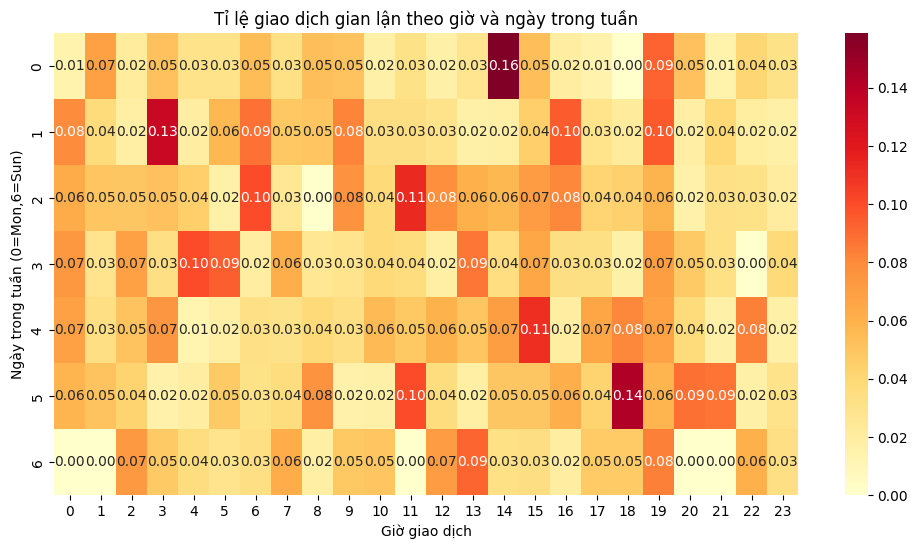

C:\Users\phant\AppData\Local\Temp\ipykernel_19620\4020109145.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="Blues_d")


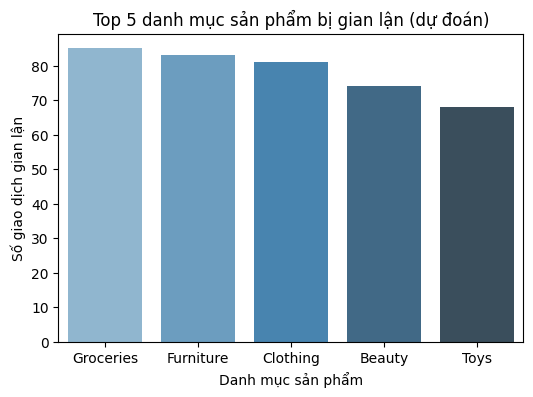

In [62]:


# Giả lập dự đoán mô hình
#  giả lập kết quả mô hình dự đoán dựa trên cột 'Is Fraud'
# Thường thì bạn sẽ dùng: y_pred = model.predict(X_test)
data["Predicted_Label"] = data["Is Fraud"].copy()  # giả lập
data["Fraud_Probability"] = np.where(data["Is Fraud"]==1, 
                                     np.random.uniform(0.7, 1.0, len(data)), 
                                     np.random.uniform(0.0, 0.3, len(data)))

# Biểu đồ số lượng giao dịch hợp lệ vs gian lận
plt.figure(figsize=(6,4))
sns.countplot(x="Predicted_Label", data=data)
plt.title("Số lượng giao dịch hợp lệ vs gian lận (dự đoán)")
plt.xlabel("0 = Hợp lệ | 1 = Gian lận")
plt.ylabel("Số lượng giao dịch")
plt.show()

#Biểu đồ xác suất gian lận
plt.figure(figsize=(8,4))
sns.histplot(data["Fraud_Probability"], bins=50, kde=True, color='orange')
plt.title("Phân phối xác suất gian lận")
plt.xlabel("Xác suất gian lận")
plt.ylabel("Số giao dịch")
plt.show()

# Heatmap các giao dịch theo giờ và ngày trong tuần (Fraud)
pivot_table = data.pivot_table(
    index="Transaction DOW", columns="Transaction Hour", 
    values="Predicted_Label", aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Tỉ lệ giao dịch gian lận theo giờ và ngày trong tuần")
plt.xlabel("Giờ giao dịch")
plt.ylabel("Ngày trong tuần (0=Mon,6=Sun)")
plt.show()

#  Top 5 danh mục sản phẩm gian lận
top_fraud = data[data["Predicted_Label"]==1]["Product Category"].value_counts().head(5)

plt.figure(figsize=(6,4))
sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="Blues_d")
plt.title("Top 5 danh mục sản phẩm bị gian lận (dự đoán)")
plt.ylabel("Số giao dịch gian lận")
plt.xlabel("Danh mục sản phẩm")
plt.show()


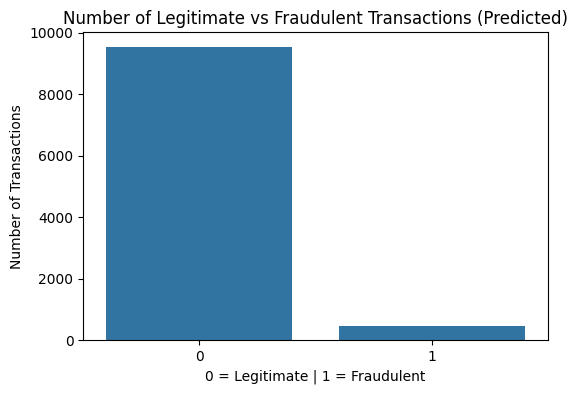

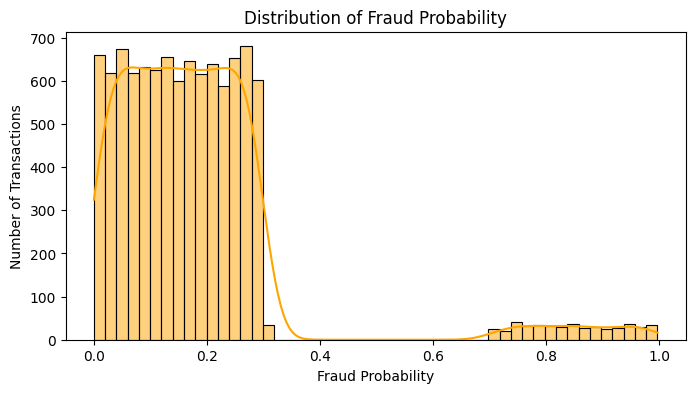

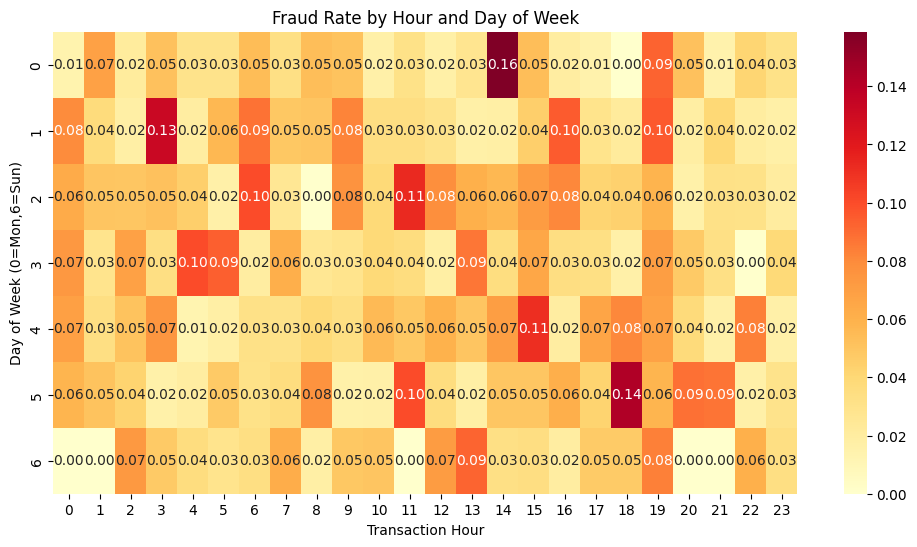

C:\Users\phant\AppData\Local\Temp\ipykernel_19620\3323737742.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="Blues_d")


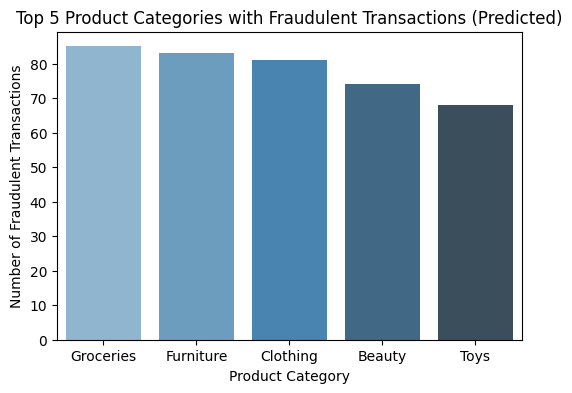

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#In reality, you'd use: y_pred = model.predict(X_test)
data["Predicted_Label"] = data["Is Fraud"].copy()  # simulated prediction
data["Fraud_Probability"] = np.where(
    data["Is Fraud"]==1, 
    np.random.uniform(0.7, 1.0, len(data)), 
    np.random.uniform(0.0, 0.3, len(data))
)

# Countplot: Fraud vs. Legitimate Transactions
plt.figure(figsize=(6,4))
sns.countplot(x="Predicted_Label", data=data)
plt.title("Number of Legitimate vs Fraudulent Transactions (Predicted)")
plt.xlabel("0 = Legitimate | 1 = Fraudulent")
plt.ylabel("Number of Transactions")
plt.show()

# Histogram: Fraud Probability Distribution
plt.figure(figsize=(8,4))
sns.histplot(data["Fraud_Probability"], bins=50, kde=True, color='orange')
plt.title("Distribution of Fraud Probability")
plt.xlabel("Fraud Probability")
plt.ylabel("Number of Transactions")
plt.show()

#Heatmap: Fraud Rate by Hour and Day of Week
pivot_table = data.pivot_table(
    index="Transaction DOW", columns="Transaction Hour", 
    values="Predicted_Label", aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Fraud Rate by Hour and Day of Week")
plt.xlabel("Transaction Hour")
plt.ylabel("Day of Week (0=Mon,6=Sun)")
plt.show()

# Top 5 Product Categories by Fraud Count
top_fraud = data[data["Predicted_Label"]==1]["Product Category"].value_counts().head(5)

plt.figure(figsize=(6,4))
sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="Blues_d")
plt.title("Top 5 Product Categories with Fraudulent Transactions (Predicted)")
plt.ylabel("Number of Fraudulent Transactions")
plt.xlabel("Product Category")
plt.show()
